### Student Information
Name: Angelica Cassandra Loria

Student ID: 110065431

GitHub ID: acmloria

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

Take Home Exercises

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# categories

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
# obtain the documents containing the categories provided

from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)


In [6]:
import pandas as pd
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [7]:
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X[::10][0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0,alt.atheism


### ** Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [8]:
#Answer here
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [9]:
#Answer here
X[X['category']>1][:10]

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med


In [10]:
X[X['category_name']!='sci.med'][-10:]

,text,category,category_name
2234,From: David.Rice@ofa123.fidonet.org Subject: i...,0,alt.atheism
2236,From: dkusswur@falcon.depaul.edu (Daniel C. Ku...,1,comp.graphics
2237,From: datepper@phoenix.Princeton.EDU (David Aa...,0,alt.atheism
2241,From: dls@aeg.dsto.gov.au (David Silver) Subje...,1,comp.graphics
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...,1,comp.graphics
2246,From: lmvec@westminster.ac.uk (William Hargrea...,3,soc.religion.christian
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics
2249,From: shellgate!llo@uu4.psi.com (Larry L. Over...,3,soc.religion.christian
2250,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism


### **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [11]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [12]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Answer:

index 0 is a numpy null integer/float data type

index 1 is not filled with any values, in a sense, it is true null.

index 2 is string with characters N, a, N

index 3 is string with characters N, o, n, e

index 4, None is sometimes use a placeholder of a variable/object if we don't want to assign a value to it yet

index 5 is assigned as a string in memory. Even if it's an empty string, it is not null

### 5.1 Sampling


In [14]:
X_sample = X.sample(n=1000,random_state= 42) #random state
print(len(X_sample))
X_sample[0:10]

1000


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
535,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
809,From: JEK@cu.nih.gov Subject: Thinking about h...,3,soc.religion.christian
2002,From: asket@acad2.alaska.edu Subject: When is ...,3,soc.religion.christian
2166,Subject: XLib and 24 Bit Displays [Info Needed...,1,comp.graphics
1272,From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...,2,sci.med


### Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

When we a apply sampling to the dataframe, the individual data (per row data) did not change. What changed is that 

Answer:

When we get a sample n = 1000 from our original data frame, we select random 1000 records but the data per index did not change. We can also observed that the index of X_sample is randomly arranged (shuffled).

In [17]:
print("length of X", len(X))
print("length of X_sample", len(X_sample))

length of X 2257
length of X_sample 1000


In [15]:
X_sample

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


Take the first five rows of X_sample, we can see that the order of index is random compared to X (we started from 561, then 440, next is 1513, 1360 and 259)

In [16]:
X_sample[0:5]

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism


Whereas, the original dataframe X is ordered.

In [18]:
X[0:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


### **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

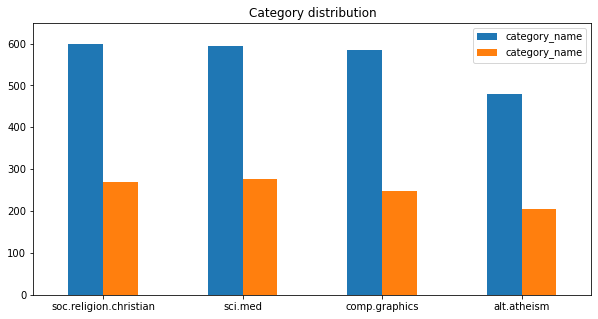

In [20]:
#Find the upper bounds of boths DataFrames
upper_X = max(X.category_name.value_counts()) + 50
upper_X_sample = max(X_sample.category_name.value_counts()) + 50
upper = 0

if upper_X > upper_X_sample:
    upper = upper_X
else:
    upper = upper_X_sample

#Concatenate both Dataframes, and plot the result:

result_combined_df = pd.concat([X.category_name.value_counts(),
                                X_sample.category_name.value_counts()], axis=1).plot(kind = 'bar',
                                                                                     title = 'Category distribution',
                                                                                     ylim = [0, upper],        
                                                                                     rot = 0, fontsize = 10, figsize = (10,5))

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [42]:
X_counts

<2257x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 365886 stored elements in Compressed Sparse Row format>

### ** Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [55]:
array_loc = X_counts[4, 0:100].toarray()[0]
term = []
for one in np.where(array_loc == 1)[0]:
    term.append(count_vect.get_feature_names()[one])

print("The terms are: ")
print(*term, sep=',')

The terms are: 
00,01


The following is code for setting up Exercise 11

In [45]:
# first twenty features
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_0000',
 'term_0000001200',
 'term_000005102000',
 'term_0001',
 'term_000100255pixel',
 'term_00014',
 'term_000406',
 'term_0007',
 'term_000usd',
 'term_0010',
 'term_001004',
 'term_0010580b',
 'term_001125',
 'term_001200201pixel',
 'term_0014',
 'term_001642',
 'term_00196',
 'term_002']

In [46]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [47]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

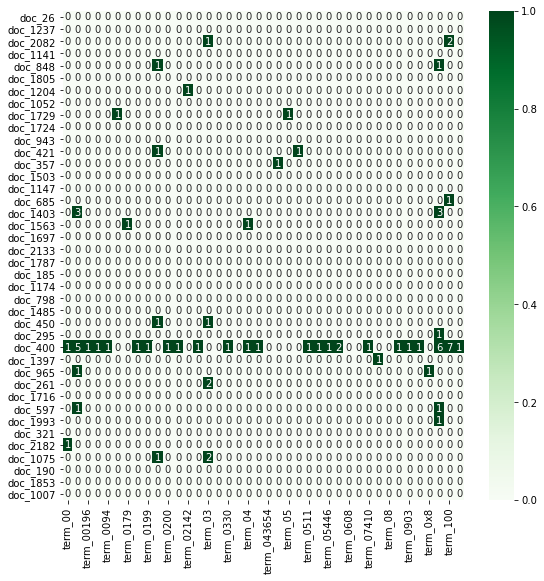

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 9))
ax = sns.heatmap(df_todraw,
                 cmap="Greens",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### ** Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

counter = 0 
samples = 0
sample_size = 100
min_terms = 30 #minimum number of terms 
size = 50 # array size

while counter<= min_terms:
    term_counts = 0
    
    X_sample_vectorizer = X.sample(sample_size)
    count_vectorizer = CountVectorizer()
    X_sample_counts = count_vectorizer.fit_transform(X_sample_vectorizer.text)
    
    samples += 1

    array = X_sample_counts[:size][:size].toarray()

    for i in range(size):
        for j in range(size):
            if(array[i][j] >= 1):
                counter = counter + 1
                if(counter>=min_terms):
                    break #since we get the desired number of terms, we are ok.
                    
print("The result is a {}:{} matrix with {} terms.".format(size,size,counter))


The result is a 50:50 matrix with 37 terms.


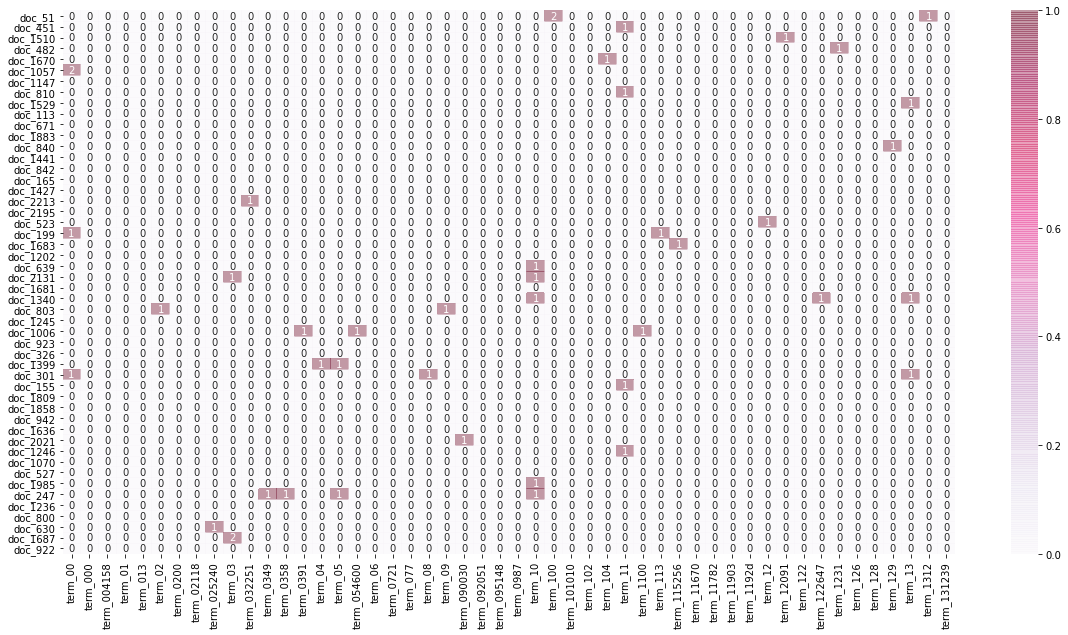

In [70]:
import seaborn as sns

#now we just plot as learned:

plot_x = ["term_"+str(i) for i in count_vectorizer.get_feature_names()[0:size]]
plot_y = ["doc_"+ str(i) for i in list(X_sample_vectorizer.index)[0:size]]
plot_z = X_sample_counts[0:size, 0:size].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd", alpha=0.4,
                 vmin=0, vmax=1, annot=True)

###  Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [62]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

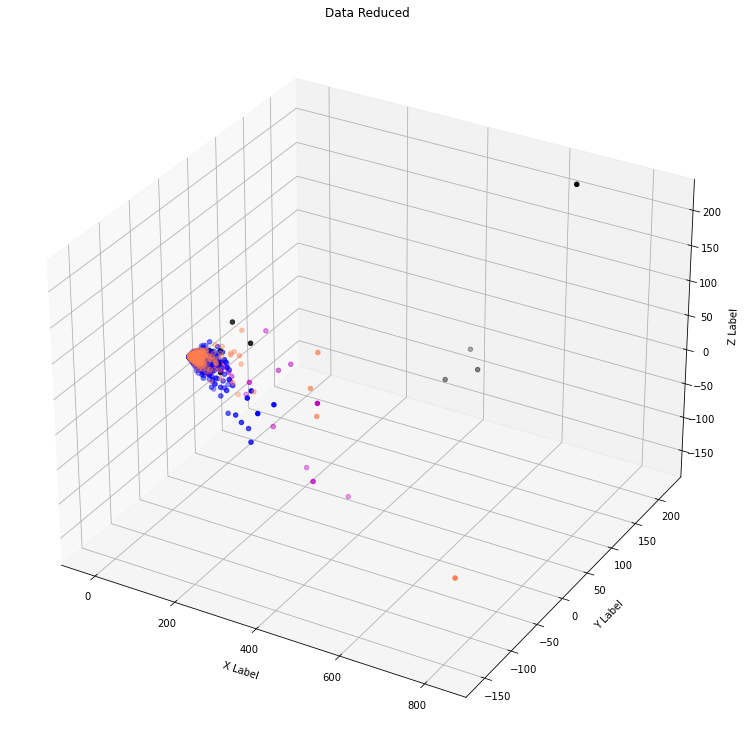

In [74]:
# plot
fig = plt.figure(figsize = (25,10))

ax = Axes3D(fig)

for c, category in zip(col, categories):
    x = X_reduced[X['category_name'] == category].T[0]
    y = X_reduced[X['category_name'] == category].T[1]
    z = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(x, y, z,  c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.set_title("Data Reduced")

plt.show()

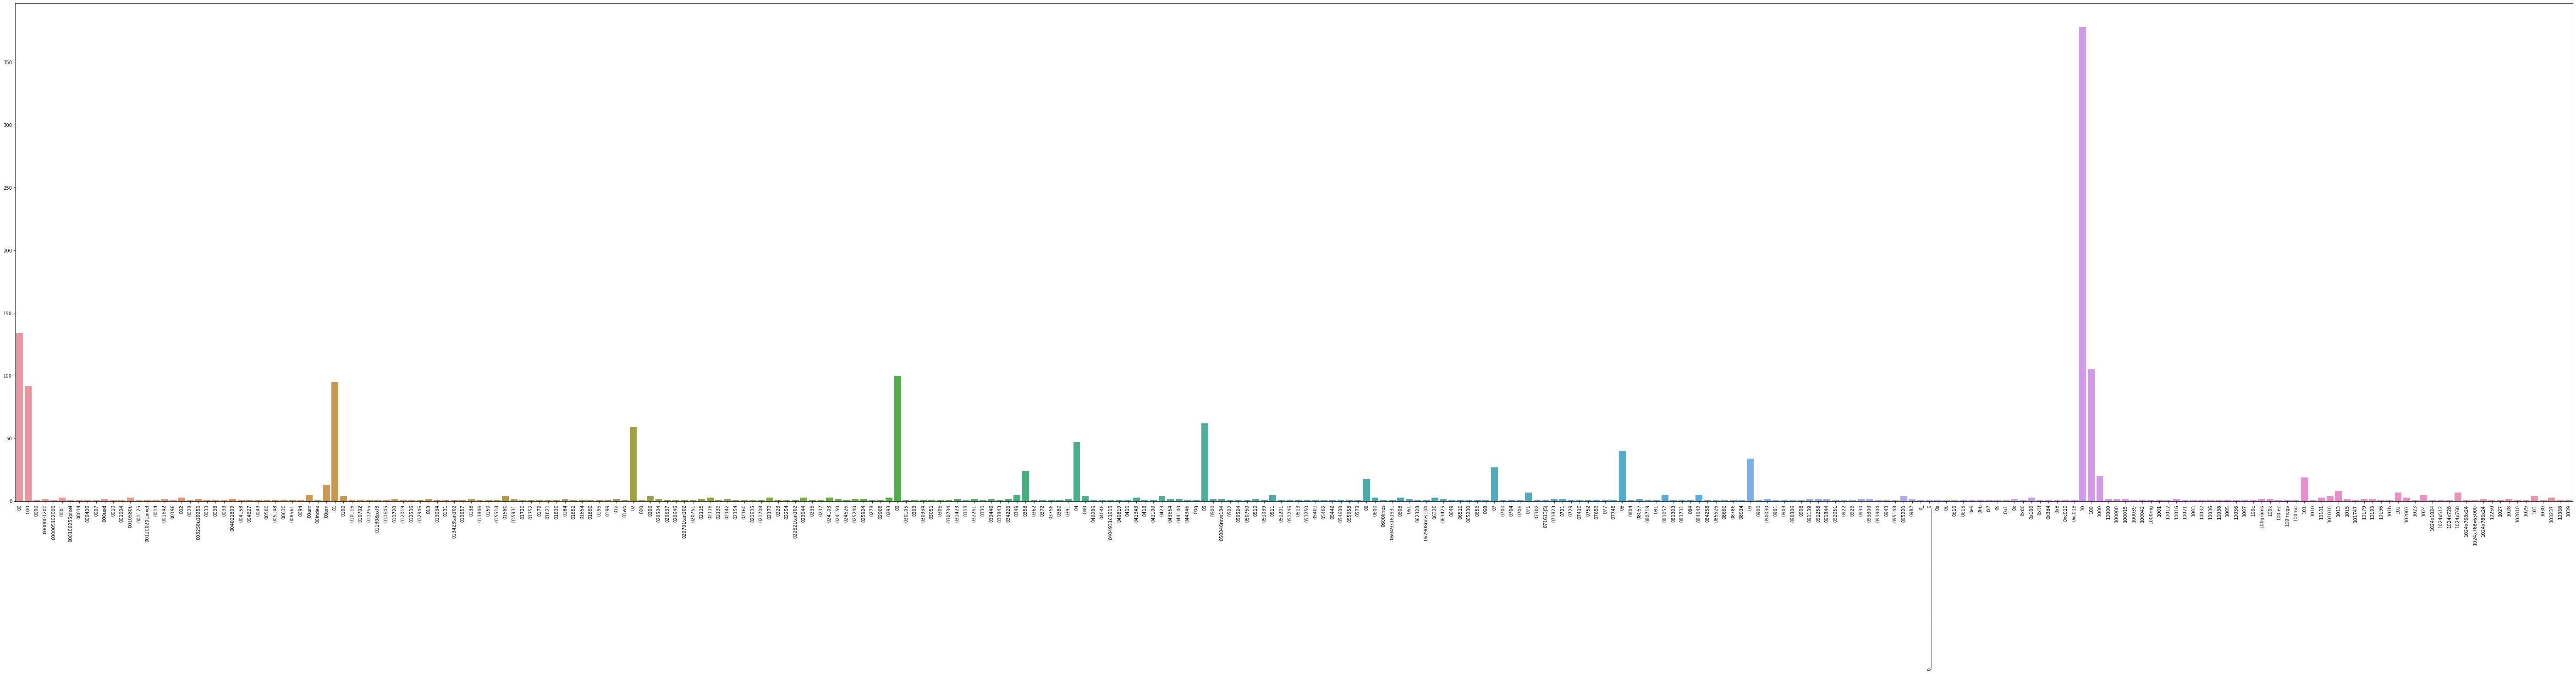

In [77]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 20))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [72]:
# Answer here

import numpy as np

term_frequencies = []

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies

array([134,  92,   1, ...,   1,   1,   1], dtype=int64)

In [80]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
                x=count_vect.get_feature_names()[:200],
                y=term_frequencies[:200],
                orientation='v'))
fig.show()

### **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [88]:
# Answer here
term_freq = []

terms = 50
term_freq = np.asarray(X_counts.sum(axis=0)[:,:terms])[0]
term_freq[::-1].sort()

fig2 = go.Figure(go.Bar(x=count_vect.get_feature_names()[:terms], 
            y=term_freq[:terms], showlegend=True, marker={'color': 'pink'}, name='Terms' ))
fig2.show()

###  **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

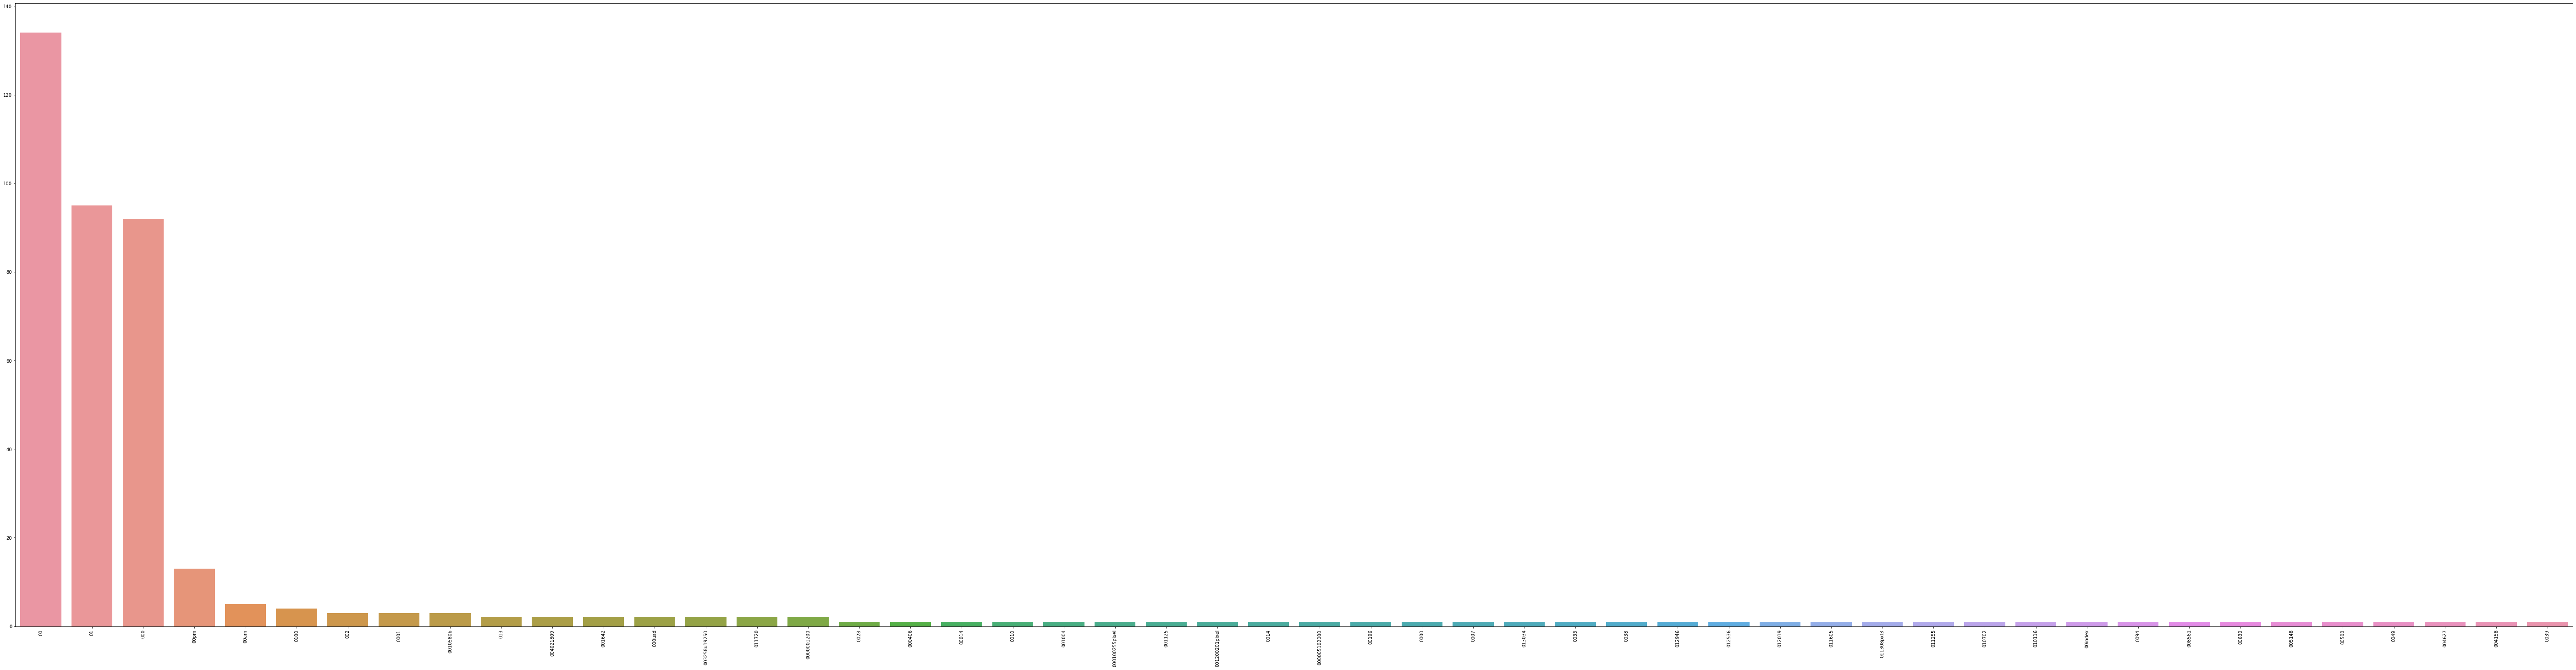

In [94]:
idx = list(reversed(np.argsort(term_frequencies)[-300:]))
plt.subplots(figsize=(100, 25))
g = sns.barplot(x=np.array(count_vect.get_feature_names())[idx], 
            y=term_frequencies[idx])
g.set_xticklabels(np.array(count_vect.get_feature_names())[idx], rotation = 90);

### **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [95]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)


LabelBinarizer()

In [96]:
print(mlb.classes_)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

['alt.atheism' 'comp.graphics' 'sci.med' 'soc.religion.christian']


,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


The `LabelBinarizer` works on both category_name column and bin_category.

# Part 2: New DataSet

Second: follow the same process from the DM2021-Lab1-master Repo on the new dataset. You don't need to explain all details as we did (some minimal comments explaining your code are useful though). This part is worth 30% of your grade.
Download the the new dataset. The dataset contains a sentence and score label. Read the specificiations of the dataset for details.
You are allowed to use and modify the helper functions in the folder of the first lab session (notice they may need modification) or create your own.

### Load Data

In [198]:
#reading the data and assigning header names

folder = './data_set_dm/'
files = [folder + 'amazon_cells_labelled.txt', folder + 'imdb_labelled.txt', folder + 'yelp_labelled.txt']

text_data = []
for file in files:
    with open(file, 'r', encoding="utf-8") as f:
        for line in f.readlines():
            line = line.split('\n')
            row = line[0].split('\t')
            
            if 'amazon' in file:
                row.append('Amazon')
                row.append(1)
            elif 'imdb' in file:
                row.append('IMDB')
                row.append(1)
            else:
                row.append('Yelp')
                row.append(1)
                
            text_data.append(row)

df = pd.DataFrame(text_data, columns=['review', 'score','category_name','category'])
df

,review,score,category_name,category
0,So there is no way for me to plug it in here i...,0,Amazon,1
1,"Good case, Excellent value.",1,Amazon,1
2,Great for the jawbone.,1,Amazon,1
3,Tied to charger for conversations lasting more...,0,Amazon,1
4,The mic is great.,1,Amazon,1
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,Yelp,1
2996,Appetite instantly gone.,0,Yelp,1
2997,Overall I was not impressed and would not go b...,0,Yelp,1
2998,"The whole experience was underwhelming, and I ...",0,Yelp,1


## Section 2: 
    Subsection: 3.2 Familiarizing yourself with the Data

### See how our dataset look like

In [152]:
len(df)

3000

In [153]:
df.shape

(3000, 4)

In [154]:
df.head(10)

,review,score,category_name,category
0,So there is no way for me to plug it in here i...,0,Amazon,1
1,"Good case, Excellent value.",1,Amazon,1
2,Great for the jawbone.,1,Amazon,1
3,Tied to charger for conversations lasting more...,0,Amazon,1
4,The mic is great.,1,Amazon,1
5,I have to jiggle the plug to get it to line up...,0,Amazon,1
6,If you have several dozen or several hundred c...,0,Amazon,1
7,If you are Razr owner...you must have this!,1,Amazon,1
8,"Needless to say, I wasted my money.",0,Amazon,1
9,What a waste of money and time!.,0,Amazon,1


In [155]:
df.tail(10)

,review,score,category_name,category
2990,The refried beans that came with my meal were ...,0,Yelp,1
2991,Spend your money and time some place else.,0,Yelp,1
2992,A lady at the table next to us found a live gr...,0,Yelp,1
2993,the presentation of the food was awful.,0,Yelp,1
2994,I can't tell you how disappointed I was.,0,Yelp,1
2995,I think food should have flavor and texture an...,0,Yelp,1
2996,Appetite instantly gone.,0,Yelp,1
2997,Overall I was not impressed and would not go b...,0,Yelp,1
2998,"The whole experience was underwhelming, and I ...",0,Yelp,1
2999,"Then, as if I hadn't wasted enough of my life ...",0,Yelp,1


In [156]:
df.iloc[::5,0:2][0:15]

,review,score
0,So there is no way for me to plug it in here i...,0
5,I have to jiggle the plug to get it to line up...,0
10,And the sound quality is great.,1
15,Highly recommend for any one who has a blue to...,1
20,I went on Motorola's website and followed all ...,0
25,Great Pocket PC / phone combination.,1
30,"This is a simple little phone to use, but the ...",0
35,You need at least 3 mins to get to your phone ...,0
40,"It has a great camera thats 2MP, and the pics ...",1
45,It has all the features I want,1


In [157]:
df.loc[::5,'review'][0:15]

0     So there is no way for me to plug it in here i...
5     I have to jiggle the plug to get it to line up...
10                      And the sound quality is great.
15    Highly recommend for any one who has a blue to...
20    I went on Motorola's website and followed all ...
25                 Great Pocket PC / phone combination.
30    This is a simple little phone to use, but the ...
35    You need at least 3 mins to get to your phone ...
40    It has a great camera thats 2MP, and the pics ...
45                       It has all the features I want
50    Not loud enough and doesn't turn on like it sh...
55    Everything about it is fine and reasonable for...
60    Essentially you can forget Microsoft's tech su...
65    The one big drawback of the MP3 player is that...
70                                    Mic Doesn't work.
Name: review, dtype: object

In [158]:
#Standard Query
df[::10][0:10]

,review,score,category_name,category
0,So there is no way for me to plug it in here i...,0,Amazon,1
10,And the sound quality is great.,1,Amazon,1
20,I went on Motorola's website and followed all ...,0,Amazon,1
30,"This is a simple little phone to use, but the ...",0,Amazon,1
40,"It has a great camera thats 2MP, and the pics ...",1,Amazon,1
50,Not loud enough and doesn't turn on like it sh...,0,Amazon,1
60,Essentially you can forget Microsoft's tech su...,0,Amazon,1
70,Mic Doesn't work.,0,Amazon,1
80,I wear it everyday and it holds up very well.,1,Amazon,1
90,For a product that costs as much as this one d...,0,Amazon,1


In [159]:
df[df['score']==0][::10][0:10]

,review,score,category_name,category


In [126]:
df[df['score']==1][::10][0:10]

,review,score,category,category_name
1,"Good case, Excellent value.",1,1,Amazon
21,I bought this to use with my Kindle Fire and a...,1,1,Amazon
44,Excellent bluetooth headset.,1,1,Amazon
61,I really recommend this faceplates since it lo...,1,1,Amazon
78,"I love this phone , It is very handy and has a...",1,1,Amazon
98,Best I've found so far .... I've tried 2 other...,1,1,Amazon
114,Absolutely great.,1,1,Amazon
130,It is so small and you don't even realize that...,1,1,Amazon
155,This phone is very fast with sending any kind ...,1,1,Amazon
173,The iGo chargers and tips are really great.,1,1,Amazon


Since we have observed that those data with score = 1 are good, we will mark the score_name as good, otherwise, bad.

In [204]:
df['score_name'] = df['score'].apply(lambda x: 'good' if x=='1' else 'bad')

In [205]:
df['score_name']

0        bad
1       good
2       good
3        bad
4       good
        ... 
2995     bad
2996     bad
2997     bad
2998     bad
2999     bad
Name: score_name, Length: 3000, dtype: object

In [161]:
df[0:10]

,review,score,category_name,category,score_name
0,So there is no way for me to plug it in here i...,0,Amazon,1,bad
1,"Good case, Excellent value.",1,Amazon,1,bad
2,Great for the jawbone.,1,Amazon,1,bad
3,Tied to charger for conversations lasting more...,0,Amazon,1,bad
4,The mic is great.,1,Amazon,1,bad
5,I have to jiggle the plug to get it to line up...,0,Amazon,1,bad
6,If you have several dozen or several hundred c...,0,Amazon,1,bad
7,If you are Razr owner...you must have this!,1,Amazon,1,bad
8,"Needless to say, I wasted my money.",0,Amazon,1,bad
9,What a waste of money and time!.,0,Amazon,1,bad


### Check Missing Values

In [162]:
#check missing value by column
df.isnull().sum()

review           0
score            0
category_name    0
category         0
score_name       0
dtype: int64

In [164]:
#check missing value by row
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
2995    0
2996    0
2997    0
2998    0
2999    0
Length: 3000, dtype: int64

In [163]:
len(df)

3000

### Check Duplicates

In [200]:
df

,review,score,category_name,category,score_name
0,So there is no way for me to plug it in here i...,0,Amazon,1,bad
1,"Good case, Excellent value.",1,Amazon,1,bad
2,Great for the jawbone.,1,Amazon,1,bad
3,Tied to charger for conversations lasting more...,0,Amazon,1,bad
4,The mic is great.,1,Amazon,1,bad
...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,Yelp,1,bad
2996,Appetite instantly gone.,0,Yelp,1,bad
2997,Overall I was not impressed and would not go b...,0,Yelp,1,bad
2998,"The whole experience was underwhelming, and I ...",0,Yelp,1,bad


In [175]:
df.duplicated()
sum(df.duplicated())

17

See how duplicates look like

In [206]:
df[df.duplicated(keep=False)]

,review,score,category_name,category,score_name
18,Works great!.,1,Amazon,1,good
179,If you like a loud buzzing to override all you...,0,Amazon,1,bad
180,Don't buy this product.,0,Amazon,1,bad
187,Great phone!.,1,Amazon,1,good
262,Works great.,1,Amazon,1,good
285,Great phone!.,1,Amazon,1,good
290,Great Phone.,1,Amazon,1,good
392,This is a great deal.,1,Amazon,1,good
402,Excellent product for the price.,1,Amazon,1,good
407,Works great.,1,Amazon,1,good


In [207]:
len(df[df.duplicated(keep=False)])

34

In [208]:
# drop duplicates
df.drop_duplicates(keep=False, inplace=True) # inplaces directly applies the changesb

In [209]:
sum(df.duplicated())

0

Now we don't have duplicates

In [210]:
len(df) #3000 - 34

2966

In [211]:
#we observed that the index stayed the same.
df.tail()

,review,score,category_name,category,score_name
2995,I think food should have flavor and texture an...,0,Yelp,1,bad
2996,Appetite instantly gone.,0,Yelp,1,bad
2997,Overall I was not impressed and would not go b...,0,Yelp,1,bad
2998,"The whole experience was underwhelming, and I ...",0,Yelp,1,bad
2999,"Then, as if I hadn't wasted enough of my life ...",0,Yelp,1,bad


In [212]:
df.reset_index(drop=True, inplace=True)
df.tail() #I just want to reset the index

,review,score,category_name,category,score_name
2961,I think food should have flavor and texture an...,0,Yelp,1,bad
2962,Appetite instantly gone.,0,Yelp,1,bad
2963,Overall I was not impressed and would not go b...,0,Yelp,1,bad
2964,"The whole experience was underwhelming, and I ...",0,Yelp,1,bad
2965,"Then, as if I hadn't wasted enough of my life ...",0,Yelp,1,bad


In [213]:
len(df)

2966

### Sampling

In [214]:
df_sample = df.sample(n=1000)
print(len(df_sample))
df_sample[0:4]

1000


,review,score,category_name,category,score_name
1894,The story line is totally predictable.,0,IMDB,1,bad
2085,At least 40min passed in between us ordering a...,0,Yelp,1,bad
739,Then a few days later the a puff of smoke came...,0,Amazon,1,bad
2514,"No, I'm going to eat the potato that I found s...",0,Yelp,1,bad


Let's check the count of our attributes

In [215]:
df_sample.score_name.value_counts()

bad     512
good    488
Name: score_name, dtype: int64

In [216]:
df_sample.category_name.value_counts()

Amazon    350
Yelp      328
IMDB      322
Name: category_name, dtype: int64

### Plot

<AxesSubplot:title={'center':'Score distribution'}>

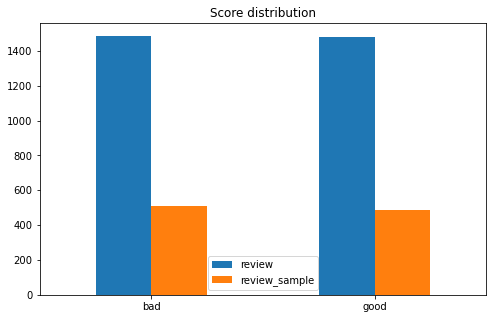

In [223]:
score_plot = pd.DataFrame({'review': df.score_name.value_counts().values,
                             'review_sample': df_sample.score_name.value_counts().reindex_like(df.score_name.value_counts()).values},
                            index = df.score_name.value_counts().index)
score_plot.plot.bar(title = 'Score distribution',
                      figsize=(8,5),
                      rot=0)

<AxesSubplot:title={'center':'Category distribution'}>

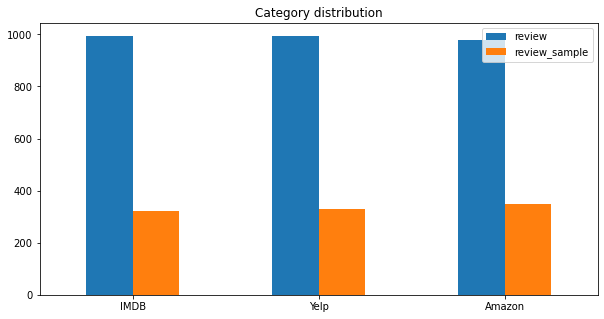

In [224]:
category_plot = pd.DataFrame({'review': df.category_name.value_counts().values,
                             'review_sample': df_sample.category_name.value_counts().reindex_like(df.category_name.value_counts()).values},
                            index = df.category_name.value_counts().index)
category_plot.plot.bar(title = 'Category distribution',
                      figsize=(10,5),
                      rot=0)

### Feature Creation

In [225]:
df['unigrams'] = df['review'].apply(lambda x: dmh.tokenize_text(x))

In [226]:
print(df[0:4]['unigrams'])
df[0:4]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object


,review,score,category_name,category,score_name,unigrams
0,So there is no way for me to plug it in here i...,0,Amazon,1,bad,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,Amazon,1,good,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,Amazon,1,good,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,Amazon,1,bad,"[Tied, to, charger, for, conversations, lastin..."


### Feature subset selection

In [228]:
count_vectorizer = CountVectorizer()
df_counts = count_vectorizer.fit_transform(df.review)

In [230]:
new_analyzer = count_vectorizer.build_analyzer()
new_analyzer(str(df.review[0:15]))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'good',
 'case',
 'excellent',
 'value',
 'great',
 'for',
 'the',
 'jawbone',
 'tied',
 'to',
 'charger',
 'for',
 'conversations',
 'lasting',
 'more',
 'the',
 'mic',
 'is',
 'great',
 'have',
 'to',
 'jiggle',
 'the',
 'plug',
 'to',
 'get',
 'it',
 'to',
 'line',
 'up',
 'if',
 'you',
 'have',
 'several',
 'dozen',
 'or',
 'several',
 'hundred',
 'if',
 'you',
 'are',
 'razr',
 'owner',
 'you',
 'must',
 'have',
 'this',
 'needless',
 'to',
 'say',
 'wasted',
 'my',
 'money',
 'what',
 'waste',
 'of',
 'money',
 'and',
 'time',
 '10',
 'and',
 'the',
 'sound',
 'quality',
 'is',
 'great',
 '11',
 'he',
 'was',
 'very',
 'impressed',
 'when',
 'going',
 'from',
 'the',
 'orig',
 '12',
 'if',
 'the',
 'two',
 'were',
 'seperated',
 'by',
 'mere',
 'ft',
 'st',
 '13',
 'very',
 'good',
 'quality',
 'though',
 '14',
 'the',
 'design',
 'is',
 'very',
 'odd',
 'as',
 'the',
 'ear',
 'clip',
 '

In [231]:
df_counts.shape

(2966, 5153)

In [232]:
count_vectorizer.get_feature_names()[0:10]


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [233]:
df_counts[0:10,0:25].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]], dtype=int64)

In [235]:
counter = 0 
samples = 0
sample_size = 100
min_terms = 30 #minimum number of terms 
size = 50 # array size

while counter<= min_terms:
    term_counts = 0
    
    df_vectorizer = df.sample(sample_size)
    cv = CountVectorizer()
    X_sample_counts = cv.fit_transform(df_vectorizer.review)
    
    samples += 1

    array = X_sample_counts[:size][:size].toarray()

    for i in range(size):
        for j in range(size):
            if(array[i][j] >= 1):
                counter = counter + 1
                if(counter>=min_terms):
                    break #since we get the desired number of terms, we are ok.
                    
print("The result is a {}:{} matrix with {} terms.".format(size,size,counter))

The result is a 50:50 matrix with 45 terms.


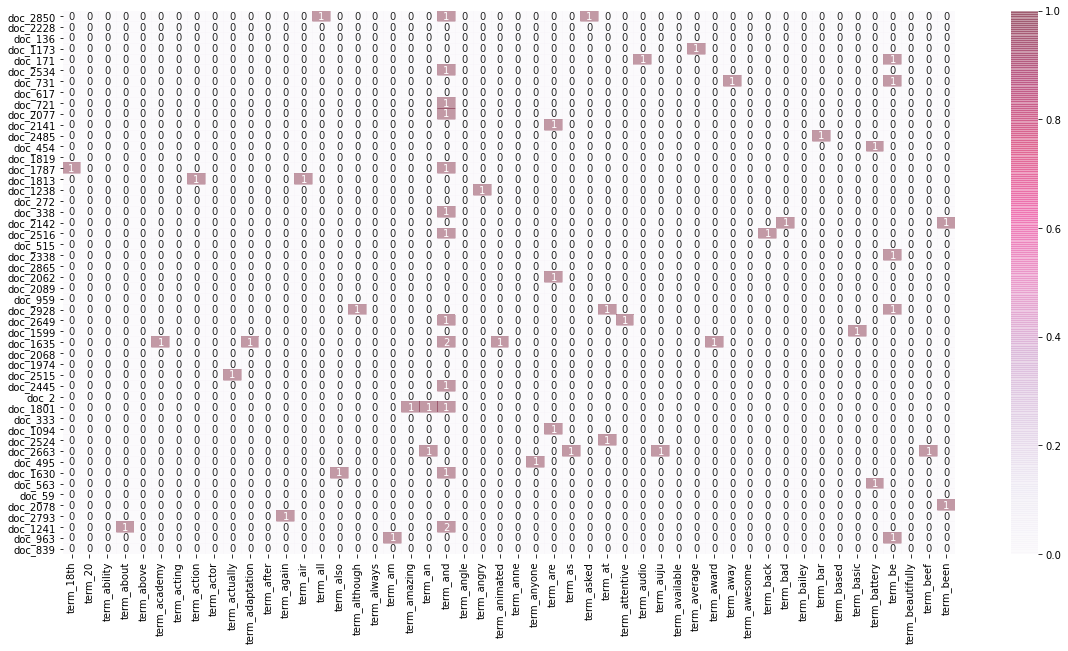

In [238]:
plot_x = ["term_"+str(i) for i in cv.get_feature_names()[0:size]]
plot_y = ["doc_"+ str(i) for i in list(df_vectorizer.index)[0:size]]
plot_z = X_sample_counts[0:size, 0:size].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd", alpha=0.4,
                 vmin=0, vmax=1, annot=True)

### Dimensionality Reduction

In [239]:
#from sklearn.decomposition import PCA ... Already imported
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
print(df_reduced.shape)

(2966, 2)


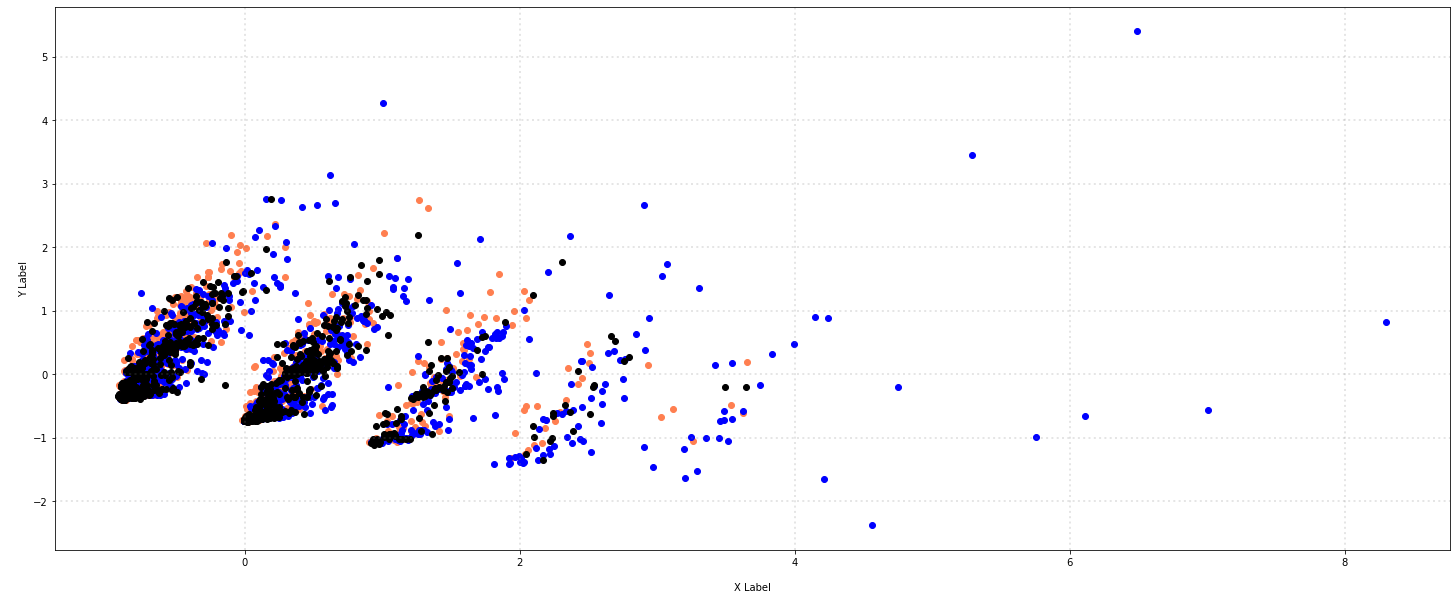

In [242]:
col2 = ['coral', 'blue', 'black']

# plot
fig2 = plt.figure(figsize = (25,10))
ax = fig2.subplots()

for c, category in zip(col2, category_name):
    xs = df_reduced[df['category_name'] == category].T[0]
    ys = df_reduced[df['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [244]:
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

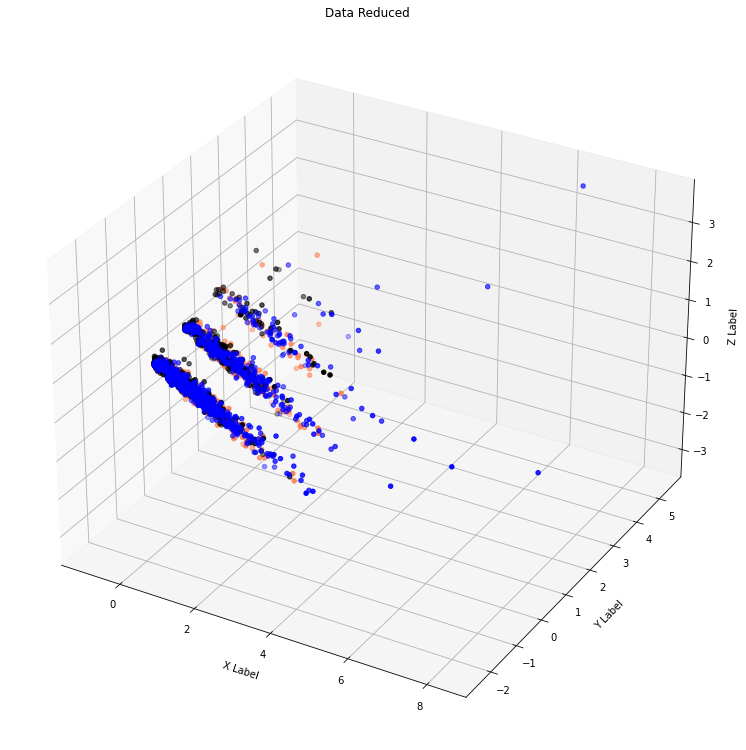

In [246]:
col2 = ['coral', 'blue', 'black']

# plot
fig2 = plt.figure(figsize = (25,10))
#ax = fig.subplots()
ax2 = Axes3D(fig2)

for c, category in zip(col2, category_name):
    xs = df_reduced[df['category_name'] == category].T[0]
    ys = df_reduced[df['category_name'] == category].T[1]
    zs = df_reduced[df['category_name'] == category].T[2]
   
    #xes3D.scatter(xs, ys, zs=0, zdir='z', s=20, depthshade=True)
    ax2.scatter(xs, ys, zs,  c = c, marker='o')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax2.set_title("Data Reduced")

plt.show()

### Attribute Transformation/ Aggregation

In [254]:
term_freq = np.asarray(df_counts.sum(axis=0))[0]

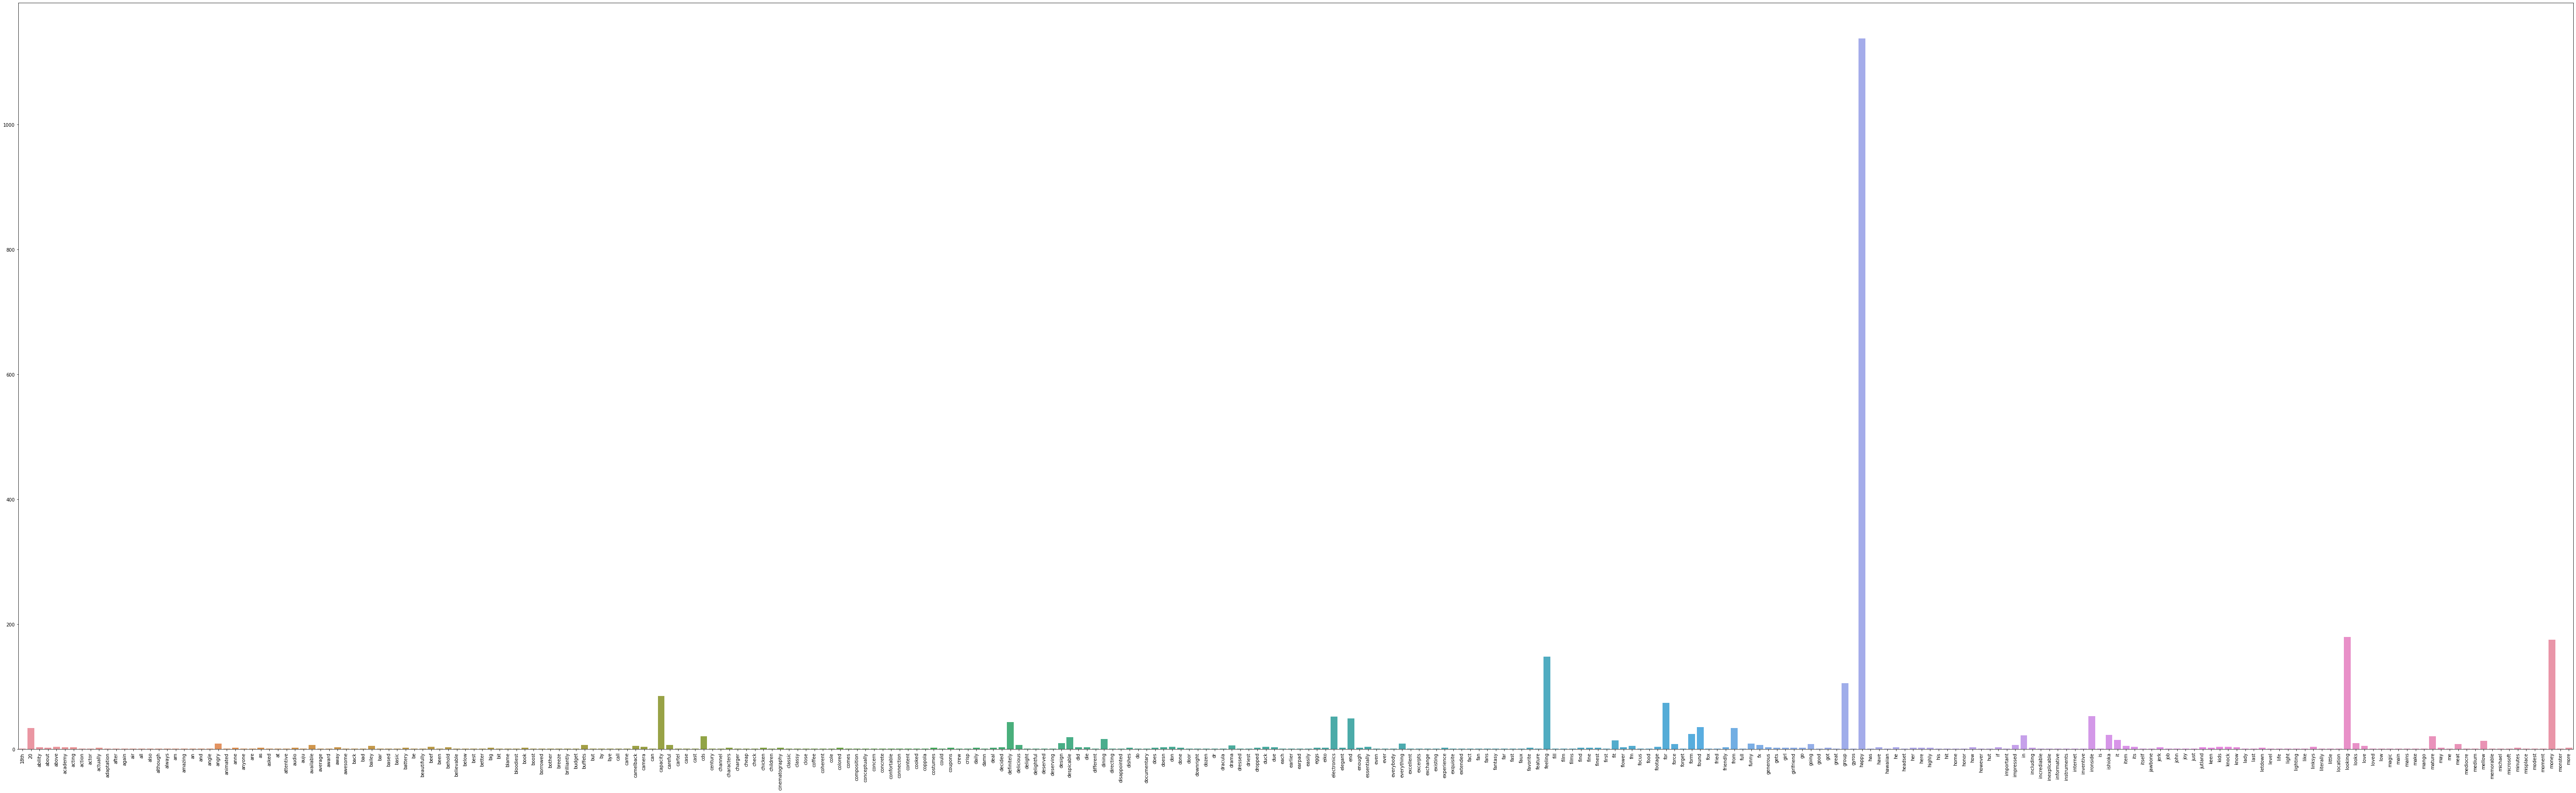

In [256]:
# by seaborn 300 terms
plt.subplots(figsize=(100, 30))
g = sns.barplot(x=cv.get_feature_names()[:300], 
                y=term_freq[:300])
g.set_xticklabels(cv.get_feature_names()[:300], rotation = 90);

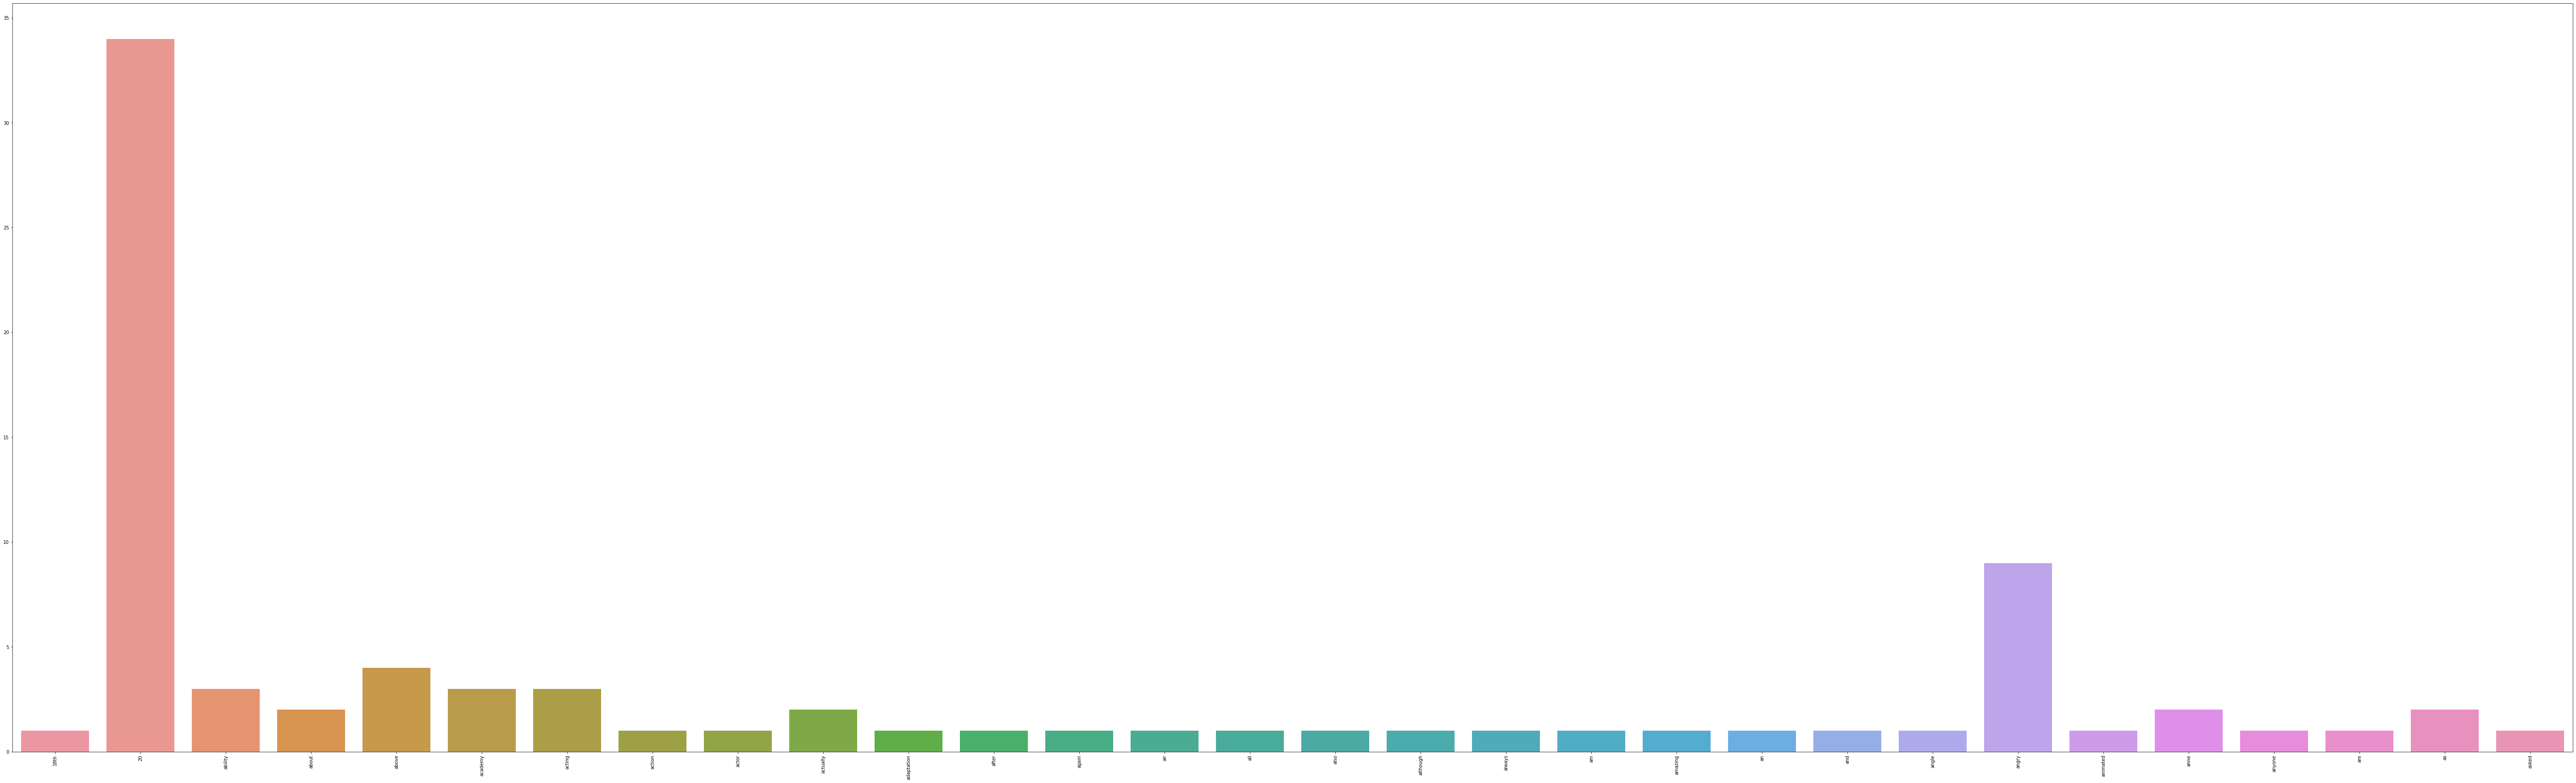

In [258]:
# by seaborn 30 terms
plt.subplots(figsize=(100, 30))
g = sns.barplot(x=cv.get_feature_names()[:30], 
                y=term_freq[:30])
g.set_xticklabels(cv.get_feature_names()[:30], rotation = 90);

In [259]:
# by plotly 300 terms
fig = go.Figure(go.Bar(
                x=cv.get_feature_names()[:300],
                y=term_freq[:300],
                orientation='v'))
fig.show()

In [260]:
# by plotly 30 terms
fig = go.Figure(go.Bar(
                x=cv.get_feature_names()[:30],
                y=term_freq[:30],
                orientation='v'))
fig.show()

In [274]:
# Plot those terms whose frequency is higher than 100
t = term_freq>100
fig = go.Figure(go.Bar(
                x=np.array(count_vectorizer.get_feature_names())[t],
                y=term_freq[t],
                orientation='v'))
fig.show()

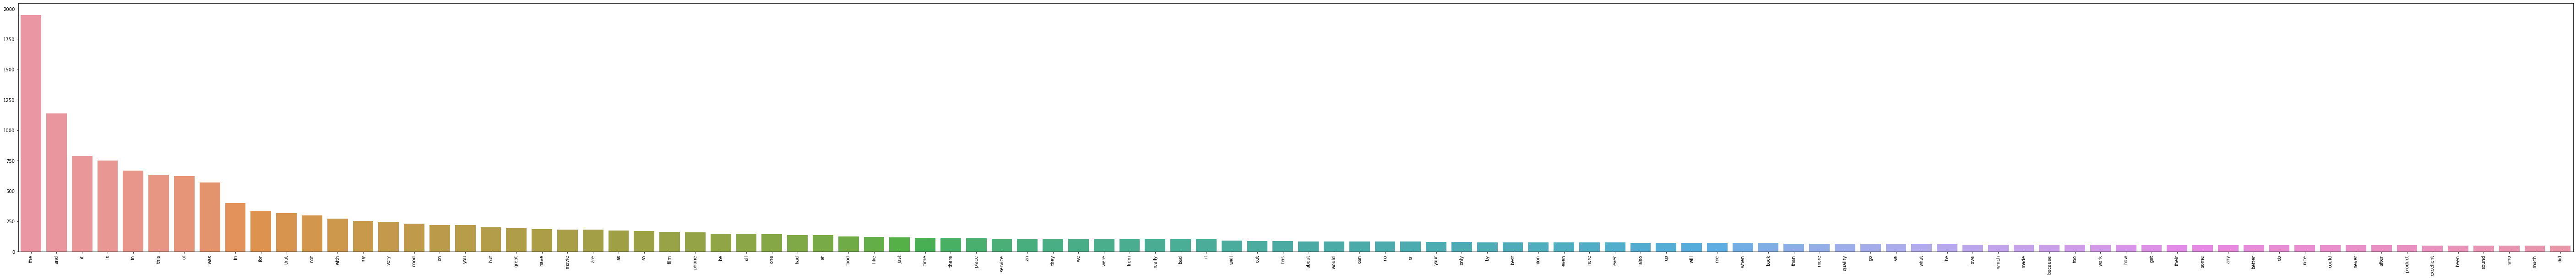

In [273]:
t = list(reversed(np.argsort(term_freq)[-100:]))
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=np.array(count_vectorizer.get_feature_names())[t], 
                y=term_freq[t])
g.set_xticklabels(np.array(count_vectorizer.get_feature_names())[t], rotation = 90);

In [268]:
import math
new_term_frequencies = [math.log(i) for i in term_freq]

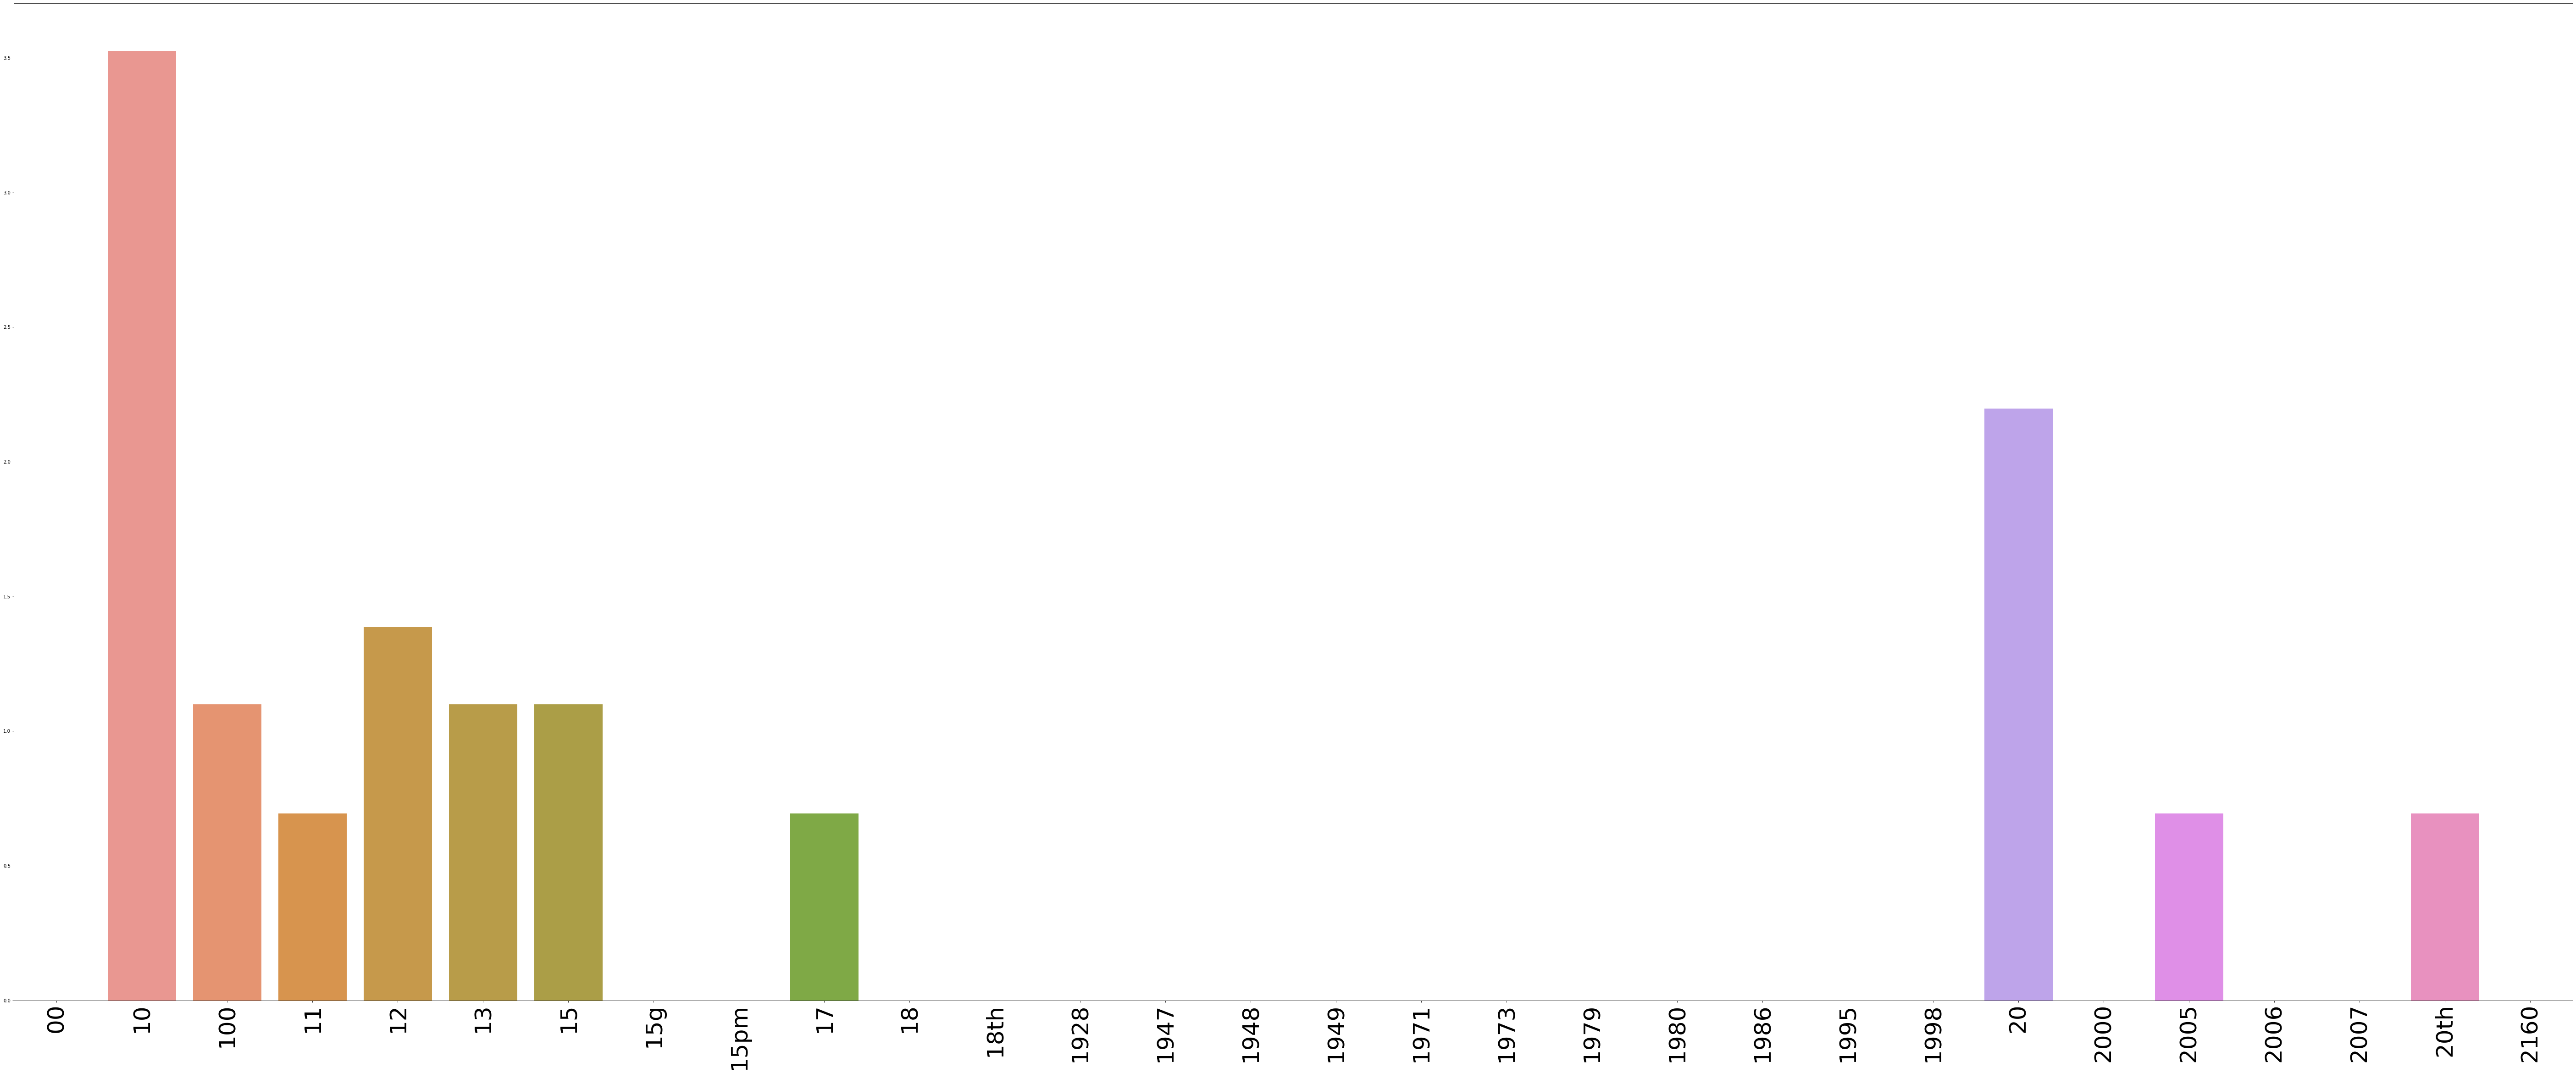

In [275]:
plt.subplots(figsize=(100, 40))
terms_num = 30
g = sns.barplot(x=count_vectorizer.get_feature_names()[:terms_num],
                y=new_term_frequencies[:terms_num])
g.set_xticklabels(count_vectorizer.get_feature_names()[:terms_num], rotation = 90, fontsize = 50);

### Discretization and Binarization

Let's do discretization and binarization of both category name and score name

In [284]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.category_name)

LabelBinarizer()

In [285]:
mlb.classes_

array(['Amazon', 'IMDB', 'Yelp'], dtype='<U6')

In [290]:
df['bin_category_name'] = mlb.transform(df.category_name).tolist()
df

,review,score,category_name,category,score_name,unigrams,bin_category_name
0,So there is no way for me to plug it in here i...,0,Amazon,1,bad,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,Amazon,1,good,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,Amazon,1,good,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,Amazon,1,bad,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,Amazon,1,good,"[The, mic, is, great, .]","[1, 0, 0]"
...,...,...,...,...,...,...,...
2961,I think food should have flavor and texture an...,0,Yelp,1,bad,"[I, think, food, should, have, flavor, and, te...","[0, 0, 1]"
2962,Appetite instantly gone.,0,Yelp,1,bad,"[Appetite, instantly, gone, .]","[0, 0, 1]"
2963,Overall I was not impressed and would not go b...,0,Yelp,1,bad,"[Overall, I, was, not, impressed, and, would, ...","[0, 0, 1]"
2964,"The whole experience was underwhelming, and I ...",0,Yelp,1,bad,"[The, whole, experience, was, underwhelming, ,...","[0, 0, 1]"


In [291]:
df[0:9]

,review,score,category_name,category,score_name,unigrams,bin_category_name
0,So there is no way for me to plug it in here i...,0,Amazon,1,bad,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,Amazon,1,good,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,Amazon,1,good,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,Amazon,1,bad,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,Amazon,1,good,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,Amazon,1,bad,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,Amazon,1,bad,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,Amazon,1,good,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,Amazon,1,bad,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"


In [292]:
mlb_score = preprocessing.LabelBinarizer()
mlb_score.fit(df.score_name)

LabelBinarizer()

In [294]:
mlb_score.classes_

array(['bad', 'good'], dtype='<U4')

In [296]:
df['bin_score_name'] = mlb.transform(df.score_name).tolist()
df[0:10]

,review,score,category_name,category,score_name,unigrams,bin_category_name,bin_score_name
0,So there is no way for me to plug it in here i...,0,Amazon,1,bad,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]","[0, 0, 0]"
1,"Good case, Excellent value.",1,Amazon,1,good,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]","[0, 0, 0]"
2,Great for the jawbone.,1,Amazon,1,good,"[Great, for, the, jawbone, .]","[1, 0, 0]","[0, 0, 0]"
3,Tied to charger for conversations lasting more...,0,Amazon,1,bad,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]","[0, 0, 0]"
4,The mic is great.,1,Amazon,1,good,"[The, mic, is, great, .]","[1, 0, 0]","[0, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,Amazon,1,bad,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]","[0, 0, 0]"
6,If you have several dozen or several hundred c...,0,Amazon,1,bad,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]","[0, 0, 0]"
7,If you are Razr owner...you must have this!,1,Amazon,1,good,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]","[0, 0, 0]"
8,"Needless to say, I wasted my money.",0,Amazon,1,bad,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]","[0, 0, 0]"
9,What a waste of money and time!.,0,Amazon,1,bad,"[What, a, waste, of, money, and, time, !, .]","[1, 0, 0]","[0, 0, 0]"


### Data Exploration

In [297]:
#Create the documents with 1 row of Review each at 50 intervals.

document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['review']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['review']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['review']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [300]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vectorizer.transform(document_to_transform_1)
document_vector_count_2 = count_vectorizer.transform(document_to_transform_2)
document_vector_count_3 = count_vectorizer.transform(document_to_transform_3)


# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [302]:
print(document_vector_count_1)

  (0, 216)	1
  (0, 622)	1
  (0, 1343)	1
  (0, 1992)	1
  (0, 2754)	1
  (0, 3062)	1
  (0, 3320)	1
  (0, 3511)	1
  (0, 4627)	1


In [304]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


The cosine similarity between a sentence and itself is 1. It seems that the 3 documents has no common words.

## Section 3:
#### >>> Meaningful New Data Visualizations
#### >>> TF-IDF Features
#### >>> Naive Bayes Classifier

### Meaningful New Data Visualizations

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

In [312]:
import numpy as np

In [308]:
df_counts.toarray().shape

(2966, 5153)

In [310]:
pca = PCA()
pca.fit(df_counts.toarray())

PCA()

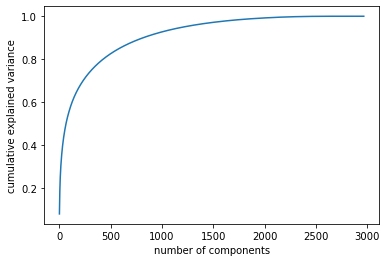

In [320]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We observe that about 500 components can explain over 80% variance. And we need about 2000 components to describe close to 100% variance. There is a large number needed for the component to reach higher ratio. 

### TF-IDF Features
Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .

In [321]:
df.head()

,review,score,category_name,category,score_name,unigrams,bin_category_name,bin_score_name
0,So there is no way for me to plug it in here i...,0,Amazon,1,bad,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]","[0, 0, 0]"
1,"Good case, Excellent value.",1,Amazon,1,good,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]","[0, 0, 0]"
2,Great for the jawbone.,1,Amazon,1,good,"[Great, for, the, jawbone, .]","[1, 0, 0]","[0, 0, 0]"
3,Tied to charger for conversations lasting more...,0,Amazon,1,bad,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]","[0, 0, 0]"
4,The mic is great.,1,Amazon,1,good,"[The, mic, is, great, .]","[1, 0, 0]","[0, 0, 0]"


In [378]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix= vectorizer.fit_transform(df['review'])

In [371]:
tfidf.toarray().shape

(2966, 5153)

### Naive Bayes Classifier

In [382]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

In [391]:
#Model 1, prepare performance evaluation from data counts, train size=0.8, test size=0.2
x_train, x_test, y_train, y_test = train_test_split(df_counts, df.score, test_size=0.2)

model_counts = MultinomialNB()
model_counts.fit(x_train, y_train)

MultinomialNB()

In [392]:
#Model 1, Accuracy score
model_counts.score(x_test, y_test)

0.8282828282828283

Word Frequency's accuracy is 82.83%

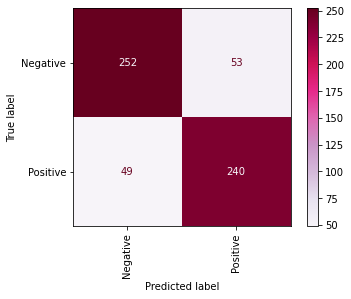

In [393]:
plot_confusion_matrix(model_counts, x_test, y_test, display_labels=['Negative', 'Positive'], cmap="PuRd", xticks_rotation='vertical')

In [394]:
#Model 2, prepare performance evaluation from data counts, train size=0.8, test size=0.2
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, df.score, test_size=0.2)

model_counts = MultinomialNB()
model_counts.fit(x_train, y_train)

MultinomialNB()

In [396]:
#Model 2, Accuracy score
model_counts.score(x_test, y_test)

0.8400673400673401

TF-IDF's accuracy is 84.01%

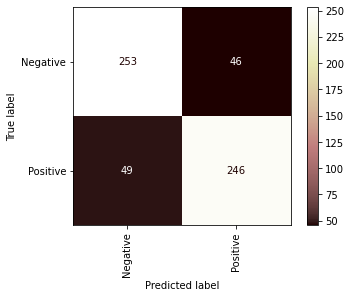

In [399]:
plot_confusion_matrix(model_counts, x_test, y_test, display_labels=['Negative', 'Positive'], cmap="pink", xticks_rotation='vertical')

When it comes to score, the TF-IDF is more accurate than word frequency because it assigns a value to a term according to its importance in a document scaled by its importance across all documents in our corpus

## Part 4

In the lab, we applied each step really quickly just to illustrate how to work with your dataset.
There are somethings that are not ideal or the most efficient/meaningful.
Each dataset can be handled differently as well.
What are those inefficent parts you noticed?
How can you improve the Data preprocessing for these specific datasets?

> With regards to checking the null values, I think it's more efficient if we get the sum of each of the column. Because it is redundant if we check the rows. If there are no null values from each column, no need to check the rows.

> For dropping duplicates, I think I need to have a context as well if the data came from different persons before dropping them. Because it is possible that 2 person may give same reviews.

* I think I should also have computed the precision and recall in the two models for the new data set, for me to make stronger conclusion.

* What I did with the score from the new data set is I binarized them. I think since the score is just 1 and 0, no need to do the binarization on that part.

